# Preparation

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks') #切換該目錄
os.listdir() #確認目錄內容
df = pd.read_csv('./kalimati_tarkari_dataset.csv', parse_dates=["Date"], index_col=["Date"], encoding='UTF-8')
df.head()

Mounted at /content/drive


,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,0,Tomato Big(Nepali),Kg,35.0,40.0,37.5
2013-06-16,1,Tomato Small(Local),Kg,26.0,32.0,29.0
2013-06-16,2,Potato Red,Kg,20.0,21.0,20.5
2013-06-16,3,Potato White,Kg,15.0,16.0,15.5
2013-06-16,4,Onion Dry (Indian),Kg,28.0,30.0,29.0


In [ ]:
# 顯示資料集的總資料數量
print(f'這個資料集中有 {df.shape[0]} 筆資料')

# 顯示重複資料的數量
print(f'重複的資料數量: {df.duplicated().sum()}')

# 計算遺失值，並顯示各欄位遺失值數量
missing_values = df.isnull().sum()
print('各欄位遺失值數量:\n', missing_values)

# 顯示總遺失值數量
print(f'總遺失值數量: {missing_values.sum()}')

# 替換空字串為NaN，並重新計算遺失值
df.replace("", np.nan, inplace=True)
missing_values = df.isnull().sum()
print('\n替換後各欄位遺失值數量:\n', missing_values)
print(f'替換後總遺失值數量: {missing_values.sum()}')

# 確保 'Commodity' 欄位為字串類型，並計算出現頻率最高的前 10 項
df['Commodity'] = df['Commodity'].astype(str)
top_commodities = df['Commodity'].value_counts().head(10)
print('\n出現頻率最高的前 10 項 \'Commodity\':\n', top_commodities)


這個資料集中有 197161 筆資料
重複的資料數量: 0
各欄位遺失值數量:
 SN           0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64
總遺失值數量: 0

替換後各欄位遺失值數量:
 SN           0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64
替換後總遺失值數量: 0

出現頻率最高的前 10 項 'Commodity':
 Commodity
Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
Potato Red              2746
Bamboo Shoot            2744
Banana                  2744
Brd Leaf Mustard        2742
Onion Dry (Indian)      2742
Name: count, dtype: int64


In [ ]:
# get the first and last date from the index
first_date = df.index.min().strftime('%Y-%m-%d')
last_date = df.index.max().strftime('%Y-%m-%d')

# combine the dates into a single string
date_range = f"{first_date} to {last_date}"
date_range

'2013-06-16 to 2021-05-13'

In [ ]:
df = df[df.Commodity == 'Ginger']
df.drop(['Commodity'],axis=1,inplace=True)
df.head()

<ipython-input-6-f459ec601542>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Commodity'],axis=1,inplace=True)


,SN,Unit,Minimum,Maximum,Average
Date,,,,,
2013-06-16,63,Kg,140.0,150.0,145.0
2013-06-17,136,Kg,140.0,150.0,145.0
2013-06-18,209,Kg,140.0,150.0,145.0
2013-06-19,282,Kg,140.0,150.0,145.0
2013-06-20,356,Kg,140.0,150.0,145.0


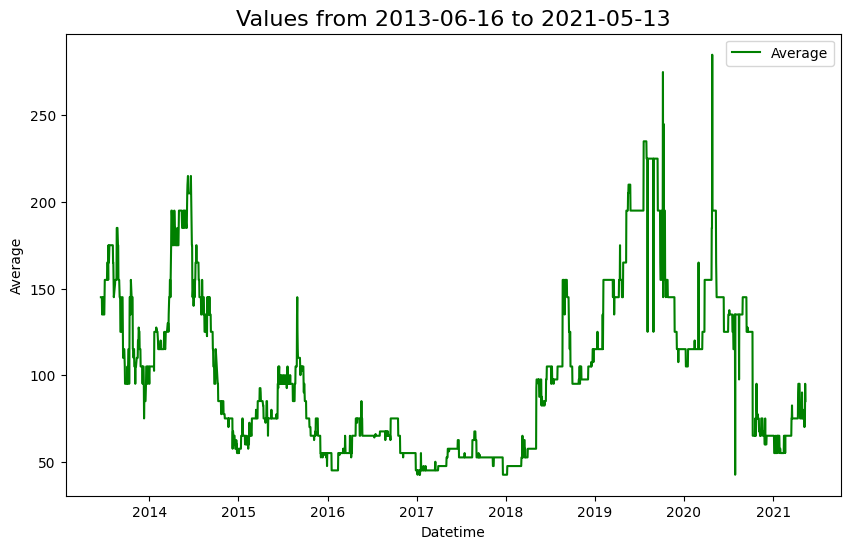

In [ ]:
# 繪製日期與平均值的折線圖
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average'], label='Average', color='green')
plt.title(f'Values from {df.index.min().strftime("%Y-%m-%d")} to {df.index.max().strftime("%Y-%m-%d")}', fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('Average')
plt.legend()
plt.show()

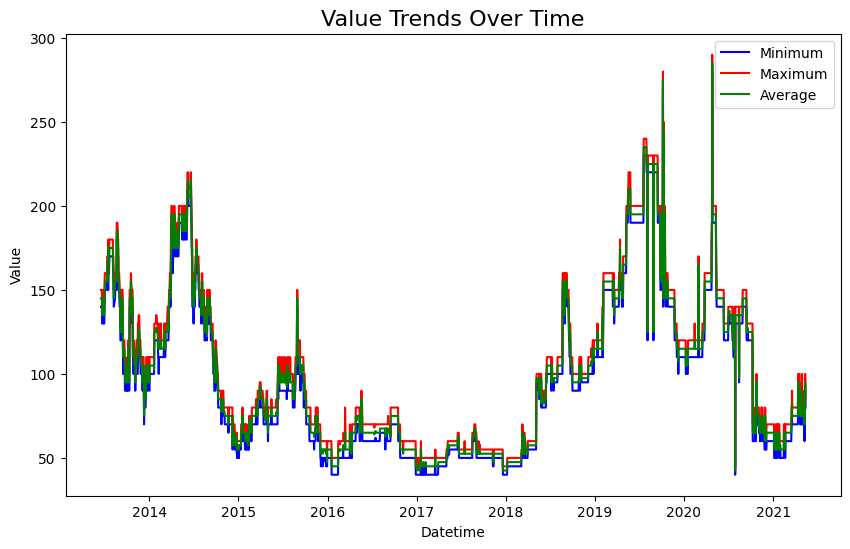

In [ ]:
# 繪製最小值、最大值和平均值的折線圖
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Minimum'], label='Minimum', color='blue')
plt.plot(df.index, df['Maximum'], label='Maximum', color='red')
plt.plot(df.index, df['Average'], label='Average', color='green')
plt.title('Value Trends Over Time', fontsize=16)
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SN,2751.0,96566.304980,55248.032724,63.0,49246.5,97449.0,142316.0,197146.0
Minimum,2751.0,94.552526,46.527842,40.0,55.0,80.0,120.0,280.0
Maximum,2751.0,103.842239,47.507196,45.0,60.0,90.0,130.0,290.0
Average,2751.0,99.197383,46.998827,42.5,57.5,85.0,125.0,285.0


In [ ]:
import matplotlib.pyplot as plt

def plot_series(time, series, fmt="-", start=0, end=None):
    """
    視覺化時間序列數據

    參數:
      time (array of int) - 包含時間步驟
      series (array of int 或 tuple) - 包含每個時間步驟的測量值
      fmt - 繪製圖表時的線條樣式
      start - 開始繪製的時間步驟
      end - 結束繪製的時間步驟
    """

    # 設置圖形的尺寸
    plt.figure(figsize=(10, 6))

    if isinstance(series, tuple):
        # 處理多個序列數據
        for series_num in series:
            # 繪製時間序列數據
            plt.plot(time[start:end], series_num[start:end], fmt)
    else:
        # 繪製單個時間序列數據
        plt.plot(time[start:end], series[start:end], fmt)

    # 標註 x 軸
    plt.xlabel("時間")

    # 標註 y 軸
    plt.ylabel("數值")

    # 在圖表上加網格
    plt.grid(True)

    # 顯示圖表
    plt.show()


In [ ]:
import csv

# 開啟 CSV 檔案
with open("./kalimati_tarkari_dataset.csv", "r") as f:

    # 建立 CSV 讀取器物件
    reader = csv.reader(f)

    # 讀取 CSV 檔案的第一行（標頭）
    header = next(reader)

    # 印出欄位名稱
    print(header)

    # 找到名為 "Date"、"Commodity" 和 "Average" 的欄位索引
    date_index = header.index("Date")
    cm_index = header.index("Commodity")
    avg_index = header.index("Average")

    # 印出 "Date"、"Commodity" 和 "Average" 欄位的索引
    print("欄位 'Date' 的索引:", date_index)
    print("欄位 'Commodity' 的索引:", cm_index)
    print("欄位 'Average' 的索引:", avg_index)


['SN', 'Commodity', 'Date', 'Unit', 'Minimum', 'Maximum', 'Average']
欄位 'Date' 的索引: 2
欄位 'Commodity' 的索引: 1
欄位 'Average' 的索引: 6


[datetime.datetime(2013, 6, 16, 0, 0), datetime.datetime(2013, 6, 17, 0, 0), datetime.datetime(2013, 6, 18, 0, 0), datetime.datetime(2013, 6, 19, 0, 0), datetime.datetime(2013, 6, 20, 0, 0), datetime.datetime(2013, 6, 21, 0, 0), datetime.datetime(2013, 6, 25, 0, 0), datetime.datetime(2013, 6, 26, 0, 0), datetime.datetime(2013, 6, 27, 0, 0), datetime.datetime(2013, 6, 28, 0, 0)] [145.0, 145.0, 145.0, 145.0, 145.0, 135.0, 145.0, 135.0, 135.0, 135.0]


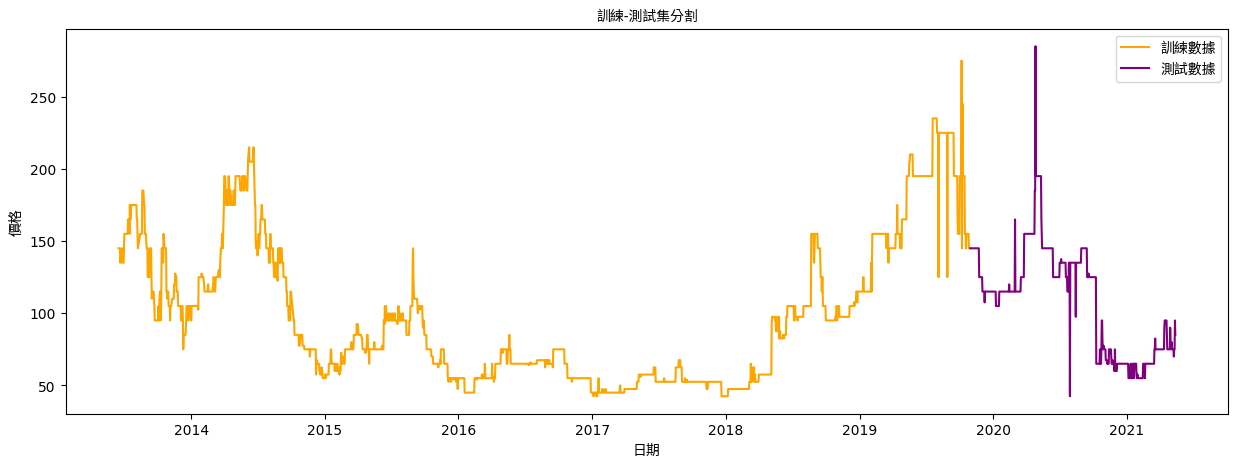

In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import requests
import os

# 定義字體下載和安裝函數
def download_font(url, font_path):
    response = requests.get(url)
    with open(font_path, 'wb') as f:
        f.write(response.content)

# 字體 URL（Noto Sans CJK）
font_url = "https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true"
font_path = "./NotoSansCJKtc-Regular.otf"

# 檢查字體是否已下載，否則下載字體
if not os.path.exists(font_path):
    download_font(font_url, font_path)

# 加載字體
zh_font = fm.FontProperties(fname=font_path)

# 初始化時間和數據序列
time = []
series = []

# 開啟 CSV 檔案
with open("./kalimati_tarkari_dataset.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")  # 讀取目標 CSV 檔案
    next(csv_reader)  # 跳過第一行（欄位標題）
    for line in csv_reader:
        if line[cm_index] == 'Ginger':  # 選擇商品為薑的行
            # 解析日期並將其轉換為 datetime 對象
            time.append(datetime.strptime(line[date_index], "%Y-%m-%d"))
            # 解析平均價格並將其轉換為浮點數
            series.append(float(line[avg_index]))

# 查看前 10 個元素
print(time[:10], series[:10])

# 定義分割比例
split_ratio = 0.8  # 80% 用於訓練集
split_time = int(len(series) * split_ratio)

# 獲取訓練集
time_train = time[:split_time]
x_train = series[:split_time]

# 獲取驗證集
time_valid = time[split_time:]
x_valid = series[split_time:]

# 顯示訓練/測試集的分割圖
fig = plt.figure(figsize=(15, 5))
plt.plot(time_train, x_train, color='orange', label='訓練數據')
plt.plot(time_valid, x_valid, color='purple', label='測試數據')
plt.xlabel('日期', fontproperties=zh_font)
plt.ylabel('價格', fontproperties=zh_font)
plt.title('訓練-測試集分割', fontproperties=zh_font)
plt.legend(prop=zh_font)
plt.show()


# Prepare Features and Labels

In [ ]:
# Parameters
window_size = 7
batch_size = 32
shuffle_buffer_size = 1000
epochs_num = 10

# 設置隨機種子
tf.random.set_seed(42)

In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """生成數據集視窗

    參數:
      series (float數組) - 包含時間序列的值
      window_size (int) - 要包含在特徵中的時間步數
      batch_size (int) - 批次大小
      shuffle_buffer (int) - 用於shuffle方法的緩衝區大小

    返回:
      dataset (TF Dataset) - 包含時間視窗的TF Dataset
    """

    # 從序列值生成TF Dataset
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # 視窗化數據，但僅取具有指定大小的
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # 通過將其元素放入單個批次來展平視窗
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # 創建具有特徵和標籤的元組
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # 打亂視窗
    dataset = dataset.shuffle(shuffle_buffer)

    # 創建批次的視窗
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset


In [ ]:
# Generate the dataset windows
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

In [ ]:
# Generate data windows of the validation set
val_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """利用輸入模型對數據窗口生成預測值

    參數:
      model (TF Keras Model) - 接受數據窗口的模型
      series (array of float) - 包含時間序列值的數組
      window_size (int) - 窗口中包含的時間步數
      batch_size (int) - 批次大小

    返回:
      forecast (numpy array) - 包含預測值的數組
    """
    # 透過序列值生成TF Dataset
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # 窗口化數據，但僅採用指定大小的窗口
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # 透過將其元素放入單個批次來展開窗口
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # 創建窗口的批次
    dataset = dataset.batch(batch_size).prefetch(1)

    # 對整個數據集進行預測
    forecast = model.predict(dataset)

    return forecast

def mean_absolute_scaled_error(y_true, y_pred):
    """
    實現MASE（假設數據無季節性）。
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # 找到簡單預測（無季節性）的MAE
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # 我們的季節性為1天（因此移動1天）

    return mae / mae_naive_no_season

def r_squared(y_true, y_pred):
    residual = tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))
    total = tf.reduce_sum(tf.square(tf.subtract(y_true, tf.reduce_mean(y_true))))
    r2 = tf.subtract(1.0, tf.divide(residual, total))
    return r2

def evaluate_preds(y_true, y_pred):
    # 確保為float32（用於計算指標）
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # 計算各種指標
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    r2 = r_squared(y_true, y_pred)

    # 針對不同尺寸的指標進行處理（對於較長的時間範圍，將張量聚合為平均值）
    if mae.ndim > 0: # 如果mae不是標量，透過聚合張量為平均值將其縮減為一個數字
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy(),
        "r2": r2.numpy()
    }  # 增加R2指標


# Dense Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam

In [ ]:
# Dense Model
model_dense = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_dense.summary()

model_dense.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)
model_dense.fit(dataset,validation_data=val_set, epochs=epochs_num)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                256       
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 801 (3.13 KB)
Trainable params: 801 (3.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 2s 14ms/step - loss: 73.4392 - mae: 73.9380 - val_loss: 10.3417 - val_mae: 10.8373
Epoch 2/10
69/69 [==============================] - 1s 11ms/step - loss: 3.6976 - mae: 4.1085 - val_loss: 3.9052 - val_mae: 4.3831
Epoch 3/10
69/69 [====

In [ ]:
# Evaluate model on test data
model_dense.evaluate(val_set)

17/17 [==============================] - 0s 2ms/step - loss: 3.3574 - mae: 3.6611


[3.3574352264404297, 3.661078929901123]

In [ ]:
# 縮減原始序列
forecast_series = series[split_time - window_size:-1]

18/18 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


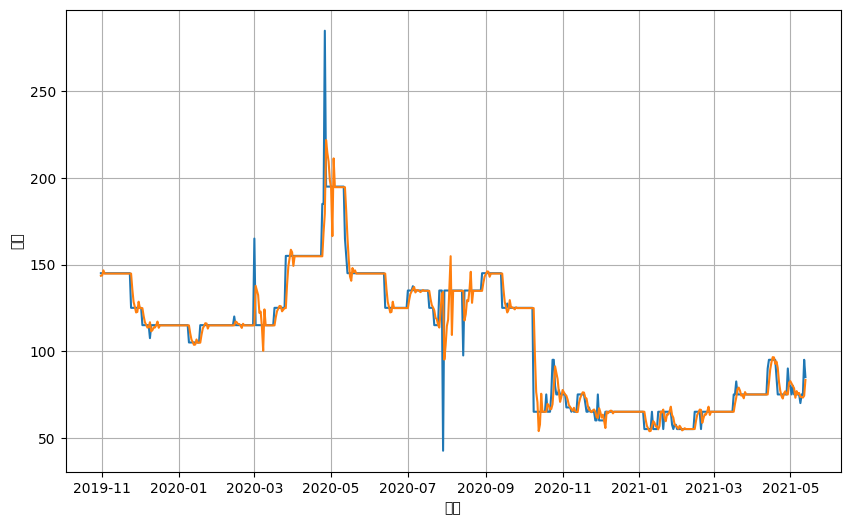

In [ ]:
# 使用輔助函數生成預測值
forecast_dense = model_forecast(model_dense, forecast_series, window_size, batch_size)

# 刪除單維度軸
results_dense = forecast_dense.squeeze()

# 繪製結果
plot_series(time_valid, (x_valid, results_dense))

In [ ]:
# 評估預測值
results_dense = evaluate_preds(y_true=x_valid, # 縮減至正確形狀
                y_pred=results_dense)
results_dense

{'mae': 3.6240945,
 'mse': 91.332245,
 'rmse': 9.55679,
 'mape': 3.7173557,
 'mase': 1.513479,
 'r2': 0.9312958}

# MLP

In [ ]:
# 構建 MLP 模型
model_mlp = Sequential([
    Dense(64, input_shape=[window_size], activation='relu'),  # 第一個隱藏層，64 個神經元
    Dense(32, activation='relu'),  # 第二個隱藏層，32 個神經元
    Dense(16, activation='relu'),  # 第三個隱藏層，16 個神經元
    Dense(1)  # 輸出層
])

# 輸出模型摘要
model_mlp.summary()

# 設置訓練參數
model_mlp.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

# 訓練模型
model_mlp.fit(dataset, validation_data=val_set, epochs=epochs_num)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 2s 13ms/step - loss: 14.2309 - mae: 14.7109 - val_loss: 4.3880 - val_mae: 4.6568
Epoch 2/10
69/69 [=

In [ ]:
# Evaluate model on test data
model_mlp.evaluate(val_set)

17/17 [==============================] - 0s 3ms/step - loss: 3.5111 - mae: 3.9999


[3.5111284255981445, 3.999889612197876]

18/18 [==============================] - 0s 5ms/step


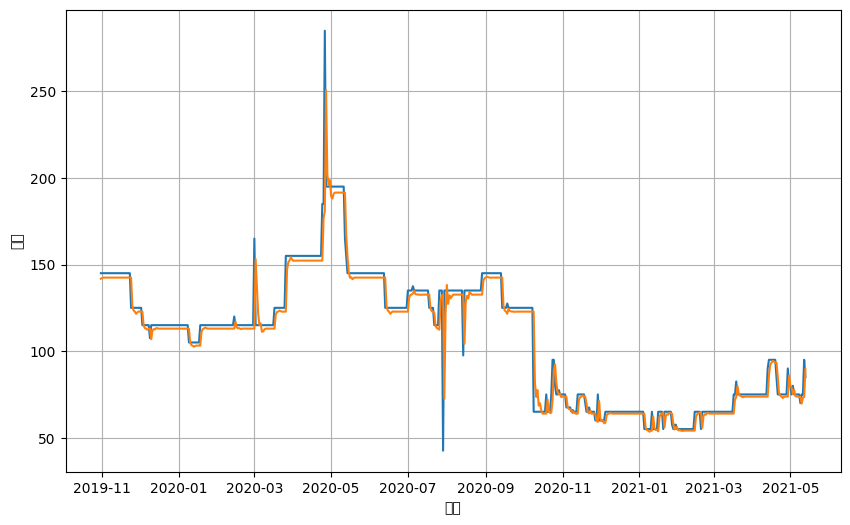

In [ ]:
# 使用輔助函數生成預測值
forecast_mlp = model_forecast(model_mlp, forecast_series, window_size, batch_size)

# 刪除單維度軸
results_mlp = forecast_mlp.squeeze()

# 繪製結果
plot_series(time_valid, (x_valid, results_mlp))


In [ ]:
# 評估預測值
results_mlp = evaluate_preds(y_true=x_valid, # 縮減至正確形狀
                y_pred=results_mlp)
results_mlp


{'mae': 3.9829805,
 'mse': 88.01895,
 'rmse': 9.381842,
 'mape': 3.9724414,
 'mase': 1.6633555,
 'r2': 0.93378824}

# SimpleRNN Model

In [ ]:
from tensorflow.keras.layers import SimpleRNN

# 構建 RNN 模型
model_rnn = Sequential([
    SimpleRNN(64, input_shape=[window_size, 1]),  # RNN 層，64 個單元
    Dense(32, activation='relu'),  # 隱藏層，32 個神經元
    Dense(16, activation='relu'),  # 隱藏層，16 個神經元
    Dense(1)  # 輸出層
])

# 輸出模型摘要
model_rnn.summary()

# 設置訓練參數
model_rnn.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

# 訓練模型
model_rnn.fit(dataset, validation_data=val_set, epochs=epochs_num)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 6849 (26.75 KB)
Trainable params: 6849 (26.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 3s 13ms/step - loss: 90.8632 - mae: 91.3632 - val_loss: 89.9224 - val_mae: 90.4224
Epoch 2/10
69/69 

In [ ]:
# Evaluate model on test data
model_rnn.evaluate(val_set)

17/17 [==============================] - 0s 3ms/step - loss: 2.4920 - mae: 2.8175


[2.4920108318328857, 2.8174915313720703]

18/18 [==============================] - 0s 5ms/step


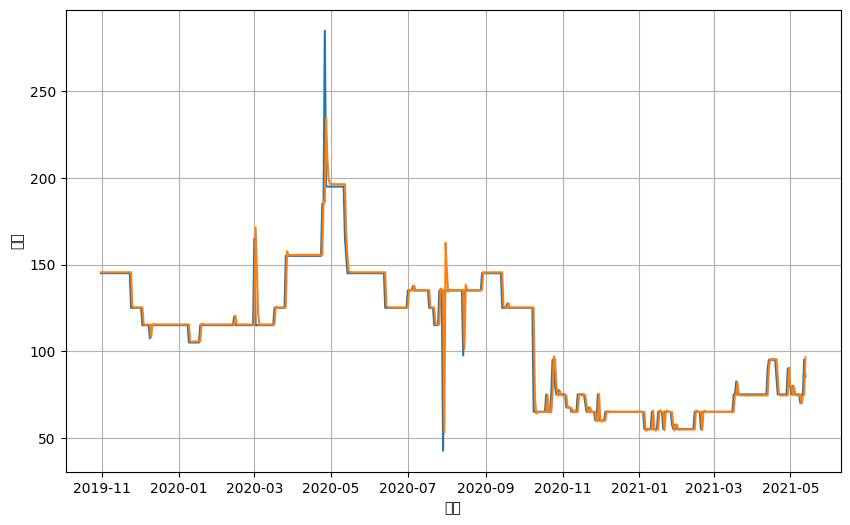

In [ ]:
# 使用輔助函數生成預測值
forecast_rnn = model_forecast(model_rnn, forecast_series, window_size, batch_size)

# 刪除單維度軸
results_rnn = forecast_rnn.squeeze()

# 繪製結果
plot_series(time_valid, (x_valid, results_rnn))

In [ ]:
# 評估預測值
results_rnn = evaluate_preds(y_true=x_valid, # 縮減至正確形狀
                y_pred=results_rnn)
results_rnn

{'mae': 2.7881827,
 'mse': 90.90261,
 'rmse': 9.5342865,
 'mape': 2.911769,
 'mase': 1.1643891,
 'r2': 0.931619}

# LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

# 構建 LSTM 模型
model_lstm = Sequential([
    LSTM(64, input_shape=[window_size, 1]),  # LSTM 層，64 個單元
    Dense(32, activation='relu'),  # 隱藏層，32 個神經元
    Dense(16, activation='relu'),  # 隱藏層，16 個神經元
    Dense(1)  # 輸出層
])

# 輸出模型摘要
model_lstm.summary()

# 設置訓練參數
model_lstm.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

# 訓練模型
model_lstm.fit(dataset, validation_data=val_set, epochs=epochs_num)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 19521 (76.25 KB)
Trainable params: 19521 (76.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
69/69 [==============================] - 4s 20ms/step - loss: 94.7251 - mae: 95.2251 - val_loss: 100.6522 - val_mae: 101.1522
Epoch 2/10
69

In [ ]:
# Evaluate model on test data
model_lstm.evaluate(val_set)

17/17 [==============================] - 0s 3ms/step - loss: 2.6141 - mae: 3.0004


[2.6141011714935303, 3.0003907680511475]

18/18 [==============================] - 1s 5ms/step


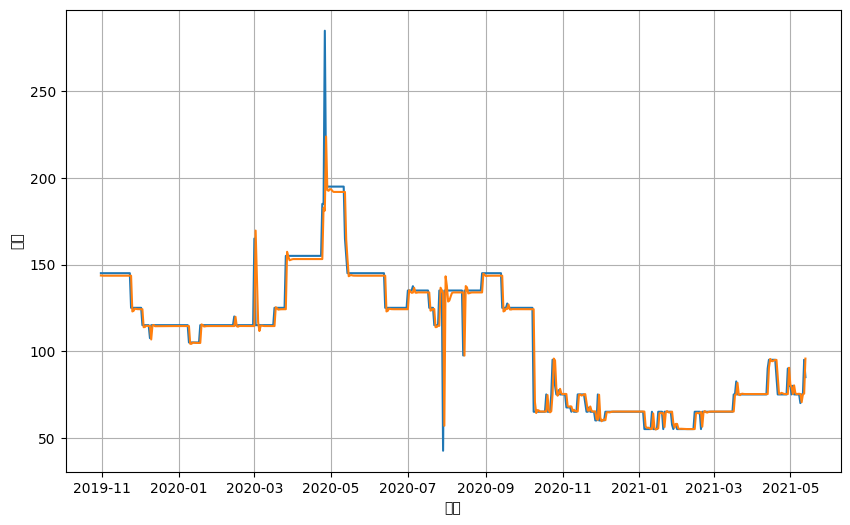

In [ ]:
# 使用輔助函數生成預測值
forecast_lstm = model_forecast(model_lstm, forecast_series, window_size, batch_size)

# 刪除單維度軸
results_lstm = forecast_lstm.squeeze()

# 繪製結果
plot_series(time_valid, (x_valid, results_lstm))

In [ ]:
# 評估預測值
results_lstm = evaluate_preds(y_true=x_valid, # 縮減至正確形狀
                y_pred=results_lstm)
results_lstm


{'mae': 2.980397,
 'mse': 86.91243,
 'rmse': 9.322683,
 'mape': 3.0218446,
 'mase': 1.2446609,
 'r2': 0.9346206}

# Conv1D+LSTM

In [ ]:
from tensorflow.keras.layers import Conv1D

# 構建 Conv1D + LSTM 模型
model_conv_lstm = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=[window_size, 1]),  # Conv1D 層，32 個濾波器
    LSTM(64, return_sequences=True),  # LSTM 層，64 個單元，返回完整序列以供下一層使用
    LSTM(32),  # 第二個 LSTM 層，32 個單元
    Dense(16, activation='relu'),  # 隱藏層，16 個神經元
    Dense(1)  # 輸出層
])

# 輸出模型摘要
model_conv_lstm.summary()

# 設置訓練參數
model_conv_lstm.compile(
    loss=Huber(),
    optimizer=Adam(),
    metrics=['mae']
)

# 訓練模型
model_conv_lstm.fit(dataset, validation_data=val_set, epochs=epochs_num)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 lstm_1 (LSTM)               (None, 5, 64)             24832     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 37921 (148.13 KB)
Trainable params: 37921 (148.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
69/69

In [ ]:
# Evaluate model on test data
model_conv_lstm.evaluate(val_set)

17/17 [==============================] - 0s 5ms/step - loss: 10.0387 - mae: 10.5340


[10.038687705993652, 10.53397274017334]

18/18 [==============================] - 2s 11ms/step


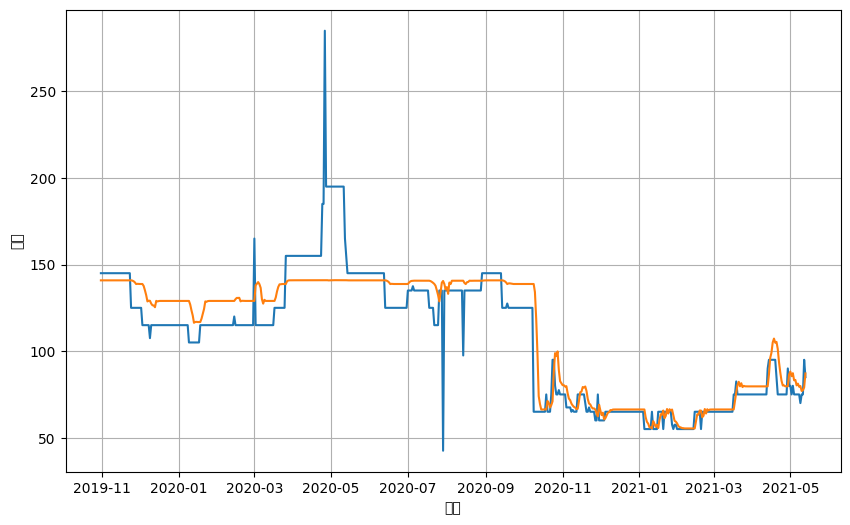

{'mae': 10.452643,
 'mse': 270.37418,
 'rmse': 16.443058,
 'mape': 9.459357,
 'mase': 4.3651886,
 'r2': 0.7966125}

In [ ]:
# 使用輔助函數生成預測值
forecast_conv_lstm = model_forecast(model_conv_lstm, forecast_series, window_size, batch_size)

# 刪除單維度軸
results_conv_lstm = forecast_conv_lstm.squeeze()

# 繪製結果
plot_series(time_valid, (x_valid, results_conv_lstm))

# 評估預測值
results_conv_lstm = evaluate_preds(y_true=x_valid, # 縮減至正確形狀
                y_pred=results_conv_lstm)
results_conv_lstm

# Compare Models

In [ ]:
# Compare different model results
model_results = pd.DataFrame({"Dense": results_dense,
                  "MLP" : results_mlp,
                  "Simple RNN": results_rnn,
                  "LSTM": results_lstm,
                  "Conv1D + LSTM": results_conv_lstm
                  }).T
model_results = model_results.sort_values(by="mae")

model_results.head(10)

,mae,mse,rmse,mape,mase,r2
Simple RNN,2.788183,90.902611,9.534286,2.911769,1.164389,0.931619
LSTM,2.980397,86.912430,9.322683,3.021845,1.244661,0.934621
Dense,3.624094,91.332245,9.556790,3.717356,1.513479,0.931296
MLP,3.982980,88.018951,9.381842,3.972441,1.663355,0.933788
Conv1D + LSTM,10.452643,270.374176,16.443058,9.459357,4.365189,0.796613


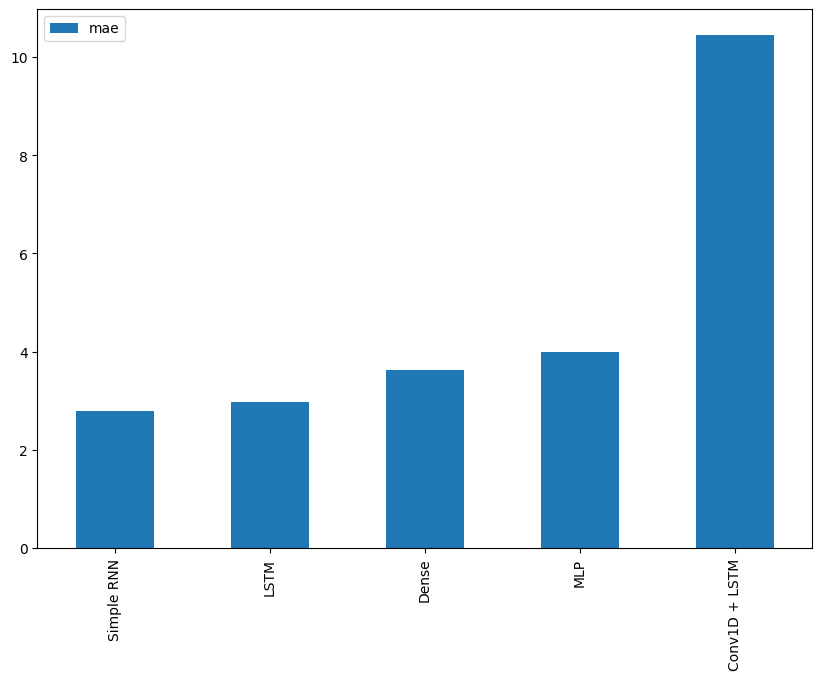

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");